In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [13]:
def rf_grid_search_cv(X, y, cv_folds=5):
    """
    Perform grid search cross-validation for Random Forest classifier on the given data.
    
    Parameters:
    - X: Features dataset.
    - y: Target variable dataset.
    - cv_folds: Number of folds for cross-validation.
    
    Returns:
    - grid_search: The fitted GridSearchCV object.
    """
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
    
    # Define a pipeline with the classifier
    pipeline = Pipeline([
        ('rf', RandomForestClassifier(random_state=23))  # Random Forest classifier
    ])
    
    param_grid = {
        'rf__n_estimators': [100, 200, 300],  # Number of trees in the forest
        'rf__max_features': ['sqrt', 'log2', None],  # The number of features to consider when looking for the best split
        'rf__max_depth': [None, 10, 20, 30],  # Maximum number of levels in each decision tree
        'rf__min_samples_split': [2, 5, 10]  # Minimum number of data points placed in a node before the node is split
    }
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv_folds, scoring='accuracy', verbose=3, n_jobs=-1)
    
    # Perform grid search cross-validation
    grid_search.fit(X_train, y_train)
    
    print("Best parameters found: ", grid_search.best_params_)
    print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
    
    # Optionally, evaluate on the test set
    test_score = grid_search.score(X_test, y_test)
    print("Test set score: {:.2f}".format(test_score))
    
    return grid_search


# Scalar Dataset - Non-Augmented

In [8]:
train_df_scalar = pd.read_pickle('/Users/erin/Documents/comp-viz/final-project/fabric/pkls/train_0406_scalar_non-aug.pkl')
train_df_scalar.head()

,label,category,0,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
0,0,Blended,3441.793288,2.028531e+07,1844.056770,0.150226,346.120911,0.005210,0.000093,0.000063,...,0.027344,0.054688,0.035156,0.039062,0.031250,0.027344,0.046875,0.062500,0.050781,0.050781
1,1,Denim,7211.992783,7.747671e+06,2271.840993,0.151475,348.998260,0.004833,-0.000067,0.000038,...,0.100000,0.048649,0.021622,0.024324,0.013514,0.021622,0.024324,0.043243,0.016216,0.070270
2,2,Polyester,8856.756862,5.854463e+06,1967.259618,0.160454,369.684998,0.002032,-0.000002,0.000008,...,0.027778,0.004630,0.004630,0.250000,0.129630,0.194444,0.018519,0.004630,0.027778,0.004630
3,0,Blended,7018.112788,7.817569e+06,1953.124972,0.152300,350.899200,0.004582,0.000011,0.000034,...,0.052239,0.063433,0.052239,0.007463,0.022388,0.044776,0.085821,0.074627,0.033582,0.029851
4,3,Cotton,7932.263905,6.971318e+06,2053.412469,0.157971,363.965454,0.002823,-0.000003,0.000017,...,0.030612,0.047619,0.054422,0.047619,0.051020,0.081633,0.013605,0.044218,0.047619,0.054422


In [9]:
X_sc = train_df_scalar.iloc[:,2:]
y_sc = train_df_scalar.iloc[:,0]

cv_params_scalar = rf_grid_search_cv(X_sc, y_sc)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 4/5] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=2, rf__n_estimators=100;, score=0.698 total time=   6.0s
[CV 5/5] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=2, rf__n_estimators=100;, score=0.695 total time=   6.0s
[CV 3/5] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=2, rf__n_estimators=100;, score=0.709 total time=   6.1s
[CV 1/5] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=2, rf__n_estimators=100;, score=0.697 total time=   6.1s
[CV 2/5] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=2, rf__n_estimators=100;, score=0.709 total time=   6.4s
[CV 2/5] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=2, rf__n_estimators=200;, score=0.717 total time=  11.7s
[CV 5/5] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=2, rf__n_estimators=200;, score=0.703 total time=

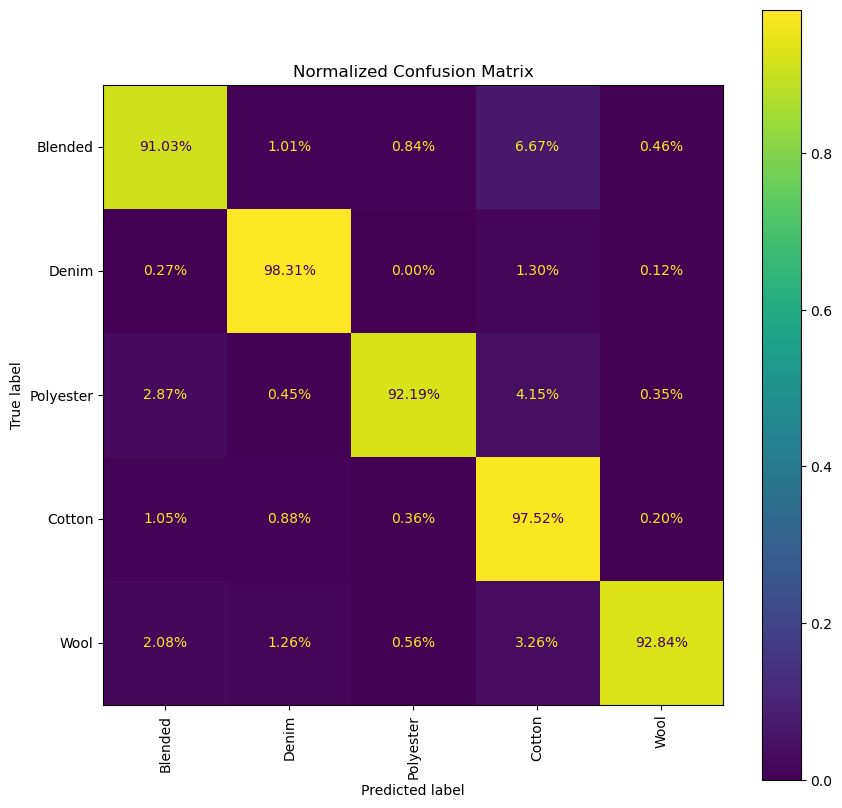

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Assuming X_test and y_test are available from the function; otherwise, split your dataset similarly outside the function
y_pred = cv_params_scalar.best_estimator_.predict(X_sc)

# Compute confusion matrix
cm = confusion_matrix(y_sc, y_pred)

# Normalize the confusion matrix by row (i.e., by the number of samples in each actual class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

class_names = ['Blended', 'Denim', 'Polyester', 'Cotton', 'Wool']

# Plot normalized confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the figure size as necessary
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=class_names)

# To display percentage values in the plot, you need to enable include_values=True and adjust the formatting accordingly
disp.plot(include_values=True, cmap='viridis', ax=ax, xticks_rotation='vertical', values_format=".2%")  # values_format controls the numeric format

plt.title('Normalized Confusion Matrix')
plt.show()


# Test Set w/ Optimized Model Parameters

# Vectorized Feature Dataset - Non-Augmented

In [10]:
train_df_vectorized = pd.read_pickle('/Users/erin/Documents/comp-viz/final-project/fabric/pkls/train_0410_vectorized_non-aug.pkl')
train_df_vectorized.head()

,label,category,0,1,2,3,4,5,6,7,...,6822,6823,6824,6825,6826,6827,6828,6829,6830,6831
0,0,Blended,216.875773,-21.220328,31.355705,113.803698,67.469517,51.739112,32.134906,-34.037195,...,-0.664340,-1.337023,-0.017352,-0.616874,-0.858821,-0.282316,1.121574,0.521872,0.946164,-0.098814
1,1,Denim,-6.478218,-44.845392,9.334029,0.559372,-5.535237,2.069803,1.668050,-2.671548,...,0.196028,0.417297,-0.643817,1.078271,0.301808,-1.118499,-0.406229,0.275195,-0.698774,0.043567
2,2,Polyester,-21.765612,15.511845,0.440996,7.523796,-23.242091,-0.555019,-0.387093,2.955491,...,0.123217,0.683356,0.218428,0.273425,-0.274362,0.532576,0.547632,-0.846333,0.320085,-1.747008
3,0,Blended,1.031767,-13.747633,-35.657890,10.977205,4.696071,1.991713,0.734960,4.531688,...,-0.123557,-0.207327,-0.153230,1.045500,0.740585,-0.987832,-1.463705,1.176062,0.128055,0.676635
4,3,Cotton,-9.987670,-17.112746,-15.962529,-15.739822,-1.963229,-4.441544,0.110439,-1.643463,...,0.713136,0.477264,-0.658661,-0.692280,-0.230699,1.451385,-1.054964,-0.210731,-0.705949,-0.167371


In [11]:
X_vec = train_df_vectorized.iloc[:,2:]
y_vec = train_df_vectorized.iloc[:,0]

cv_params_vector = rf_grid_search_cv(X_vec, y_vec)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=2, rf__n_estimators=100;, score=0.380 total time= 2.5min
[CV 2/5] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=2, rf__n_estimators=100;, score=0.384 total time= 2.6min
[CV 3/5] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=2, rf__n_estimators=100;, score=0.387 total time= 2.6min
[CV 4/5] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=2, rf__n_estimators=100;, score=0.386 total time= 2.6min
[CV 5/5] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=2, rf__n_estimators=100;, score=0.379 total time= 2.6min
[CV 1/5] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=5, rf__n_estimators=100;, score=0.385 total time= 2.4min
[CV 2/5] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=5, rf__n_estimators=100;, score=0.384 total time=

/Users/erin/anaconda3/envs/tanlp/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 5/5] END rf__max_depth=None, rf__max_features=log2, rf__min_samples_split=2, rf__n_estimators=100;, score=0.358 total time=  25.7s
[CV 1/5] END rf__max_depth=None, rf__max_features=log2, rf__min_samples_split=2, rf__n_estimators=200;, score=0.352 total time=  52.9s
[CV 2/5] END rf__max_depth=None, rf__max_features=log2, rf__min_samples_split=2, rf__n_estimators=200;, score=0.357 total time=  53.0s
[CV 3/5] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=10, rf__n_estimators=200;, score=0.376 total time=21.1min
[CV 2/5] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=10, rf__n_estimators=200;, score=0.381 total time=21.1min
[CV 4/5] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=10, rf__n_estimators=200;, score=0.384 total time=21.2min
[CV 5/5] END rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_split=10, rf__n_estimators=200;, score=0.384 total time=21.1min
[CV 5/5] END rf__max_depth=None, rf__max_features=s

KeyboardInterrupt: 

This would truly need to be run in a parallelized fashion, breaking the grid up into multiple kernels and likely done on the cloud paying for memory. Beyond that, the scores were not promising *at all* -- I think to make vectorized features worth it in this case, we may need to add more features and computational power.